In [1]:
import os
import glob
import netCDF4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from IPython.display import Image, HTML
from moviepy.editor import *
from datetime import date
import warnings
warnings.filterwarnings('ignore')

# get today values or else, use: date = 'YYYYmmdd', i.e.: 
# date = '20200707'
today = date.today()
date = today.strftime("%Y%m%d")

url00 = 'https://nomads.ncep.noaa.gov:9090/dods/wave/mww3/'+date+'/multi_1.glo_30mext'+date+'_00z'

# print all variables to check their names
file = netCDF4.Dataset(url00)
data = file.variables
print(data)
file.close()

# create directory
dirName = 'test_Hs'
 
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")


{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    grads_dim: t
    grads_mapping: linear
    grads_size: 61
    grads_min: 00z06jul2020
    grads_step: 3hr
    units: days since 1-1-1 00:00:0.0
    long_name: time
    minimum: 00z06jul2020
    maximum: 12z13jul2020
    resolution: 0.125
unlimited dimensions: 
current shape = (61,)
filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    grads_dim: y
    grads_mapping: linear
    grads_size: 336
    units: degrees_north
    long_name: latitude
    minimum: -77.5
    maximum: 90.0
    resolution: 0.5
unlimited dimensions: 
current shape = (336,)
filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    grads_dim: x
    grads_mapping: linear
    grads_size: 720
    units: degrees_east
    long_name: longitude
    minimum: 0.0
    maximum: 359.5
    resolution: 0.5
unlimited dimensions: 
current shape = (720,)
filling off, 'dirpwsfc': <class 'netCDF4._netCDF4.Variable'>
float32 dirpw

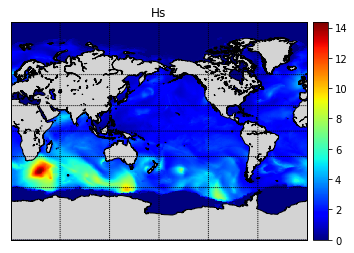

In [2]:
# example of Hs worldwide
file = netCDF4.Dataset(url00)
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
time = file.variables['time'][:]
hs = file.variables['htsgwsfc'][1,:,:]
tp = file.variables['perpwsfc'][1,:,:]
direc = file.variables['dirpwsfc'][1,:,:]

plt.figure()
m=Basemap(projection='mill',llcrnrlon=0,urcrnrlon=360,llcrnrlat=-90,urcrnrlat=90,resolution='l')
x, y = m(*np.meshgrid(lon,lat))
m.pcolormesh(x,y,hs,shading='flat',cmap=plt.cm.jet)
m.colorbar(location='right')
m.drawcoastlines()
m.fillcontinents(color='lightgrey',lake_color='blue')
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='navy')
plt.title('Hs')
plt.show()


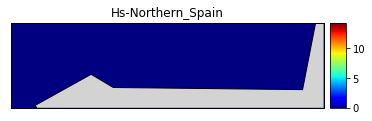

In [3]:
plt.figure()
m2 = Basemap(projection='mill',llcrnrlon=-10,urcrnrlon=-1,llcrnrlat=43,urcrnrlat=45,resolution='c')
x, y = m2(*np.meshgrid(lon,lat))
m2.pcolormesh(x,y,hs,shading='flat',cmap=plt.cm.jet)
m2.colorbar(location='right')
m2.drawcoastlines()
m2.fillcontinents(color='lightgrey',lake_color='aqua')
m2.drawmapboundary(fill_color='navy')
plt.title('Hs-Northern_Spain')
plt.show()

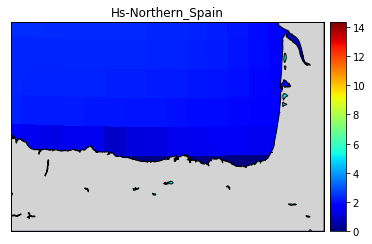

In [4]:
plt.figure()
m3 = Basemap(width=600000,height=400000,projection='lcc',resolution='h',lat_1=40,lat_2=45,lat_0=44,lon_0=-4)
x, y = m3(*np.meshgrid(lon,lat))
m3.pcolormesh(x,y,hs,shading='flat',cmap=plt.cm.jet)
m3.colorbar(location='right')
m3.drawcoastlines()
m3.fillcontinents(color='lightgrey',lake_color='aqua')
m3.drawmapboundary(fill_color='navy')
plt.title('Hs-Northern_Spain')
plt.show()